# Flange cut

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150

In [ ]:
doe = pd.read_csv('../data/doe.csv')

In [ ]:
# Load the data using pandas
data = pd.read_csv('../data/cut_flange_all.csv')
data.drop(data[data.doe_id == 1000].index, inplace=True)
data.drop(data[data.doe_id == 247].index, inplace=True)

In [4]:
from mesh_predictor import CutPredictor

reg = CutPredictor()
reg.load_data(
    doe = doe,
    data = data,
    index='doe_id',
    process_parameters = [
        'Blechdicke', 
        'Niederhalterkraft', 
        'Ziehspalt', 
        'Einlegeposition', 
        'Ziehtiefe',
        'Stempel_ID',
    ],
    categorical = [
        'Ziehspalt', 
        'Ziehtiefe',
        'Stempel_ID',
    ],
    position = 'c_phi',
    output = 'c_z',
    validation_split=0.1,
    validation_method='leaveoneout'
)
reg.save_config("../models/cut_flange.pkl")
reg.data_summary()

Data summary
------------------------------------------------------------

Process parameters:
	- Blechdicke : numerical [ 0.99  ...  1.48 ]
	- Niederhalterkraft : numerical [ 10  ...  500 ]
	- Ziehspalt : categorical [1.6, 2.4]
	- Einlegeposition : numerical [ -5  ...  5 ]
	- Ziehtiefe : categorical [30, 50, 70]
	- Stempel_ID : categorical [2, 3]
Input variables:
	- c_phi : numerical, [ 1.2217304763960306 / 1.5707963267948966 ] 
Output variable(s):
	- c_z : numerical, [ 0.0401206149999993 / 3.6027990824451805 ]

Inputs (87900, 11)
Outputs (87900, 1)
Total number of experiments: 879
Total number of samples: 87900
Number of training samples: 79200
Number of test samples: 8700
Number of experiments in the test set: 87


In [ ]:
best_config = reg.autotune(
    save_path='../models/best_flange_model',
    trials=100,
    max_epochs=100, 
    layers=[3, 5],
    neurons=[64, 256, 64],
    dropout=[0.0, 0.5, 0.1],
    learning_rate=[1e-5, 1e-3]
)
print(best_config)

In [ ]:
config = {
    'batch_size': 4096,
    'max_epochs': 100,
    'layers': [128, 128, 128, 128, 128],
    'dropout': 0.0,
    'learning_rate': 0.001
}

# or best_config from autotune if you already did it once

reg.custom_model(save_path='../models/best_flange_model', config=config, verbose=True)
reg.training_summary()

Doe_ID 261


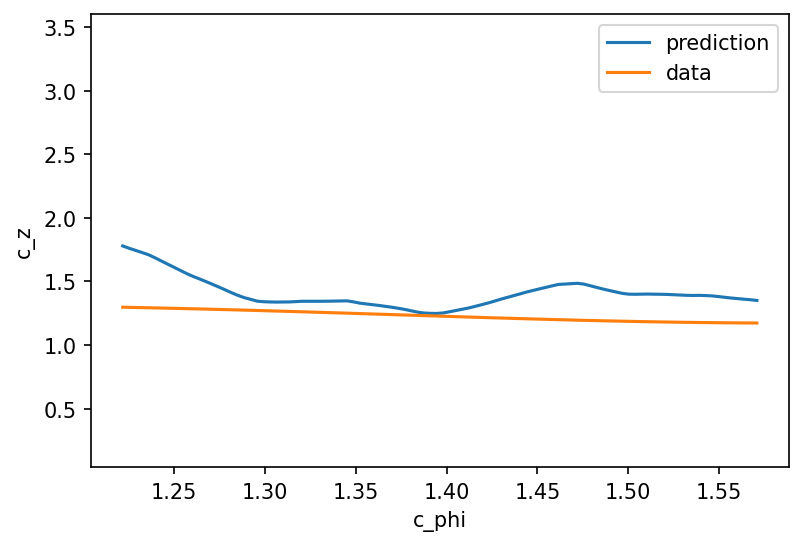

In [21]:
idx = np.random.choice(1000) + 1
print("Doe_ID", idx)
reg.compare(idx)

In [ ]:
%matplotlib inline
plt.rcParams['figure.dpi'] = 150

def viz(x, y):
    plt.figure()
    plt.plot(x, y[:, 0])
    plt.xlabel('c_phi')
    plt.ylabel('c_z')

reg.interactive(function=viz, positions=100)